<a href="https://colab.research.google.com/github/sibaprasada/House_price_prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing the Boston House price dataset

In [6]:
df = pd.read_csv("/content/housing (1).csv",
    header=None,
    delim_whitespace=True
)

df.head()


/tmp/ipython-input-988254867.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("/content/housing (1).csv",


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
df.columns = [
    "crim","zn","indus","chas","nox","rm","age","dis","rad","tax","pratio","b","istat","price"
]


In [8]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,pratio,b,istat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [9]:
print(df.shape)       #total number of rows and columns
print(df.info())      #checking missing dataPoints
print(df.describe())  #Statistical measure of data sets

(506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   crim    506 non-null    float64
 1   zn      506 non-null    float64
 2   indus   506 non-null    float64
 3   chas    506 non-null    int64  
 4   nox     506 non-null    float64
 5   rm      506 non-null    float64
 6   age     506 non-null    float64
 7   dis     506 non-null    float64
 8   rad     506 non-null    int64  
 9   tax     506 non-null    float64
 10  pratio  506 non-null    float64
 11  b       506 non-null    float64
 12  istat   506 non-null    float64
 13  price   506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284

In [10]:
df.isnull().sum()   #Check missing values


,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


Visualized housing price distribution using histograms to understand data spread and trends

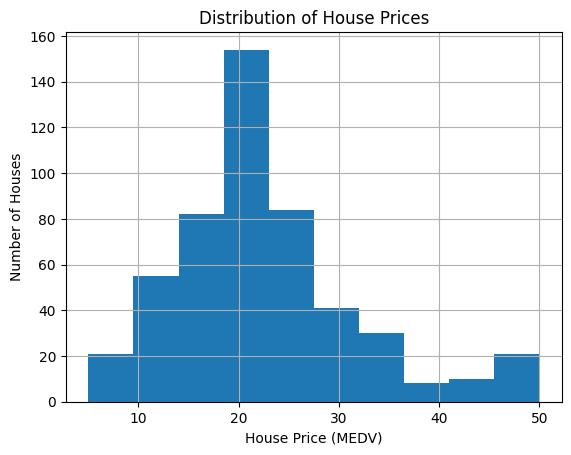

In [11]:
df["price"].hist()
plt.xlabel("House Price (MEDV)")
plt.ylabel("Number of Houses")
plt.title("Distribution of House Prices")
plt.show()

Understanding the correlation between various features in the dataset

In [12]:
correlation=df.corr()

<Axes: >

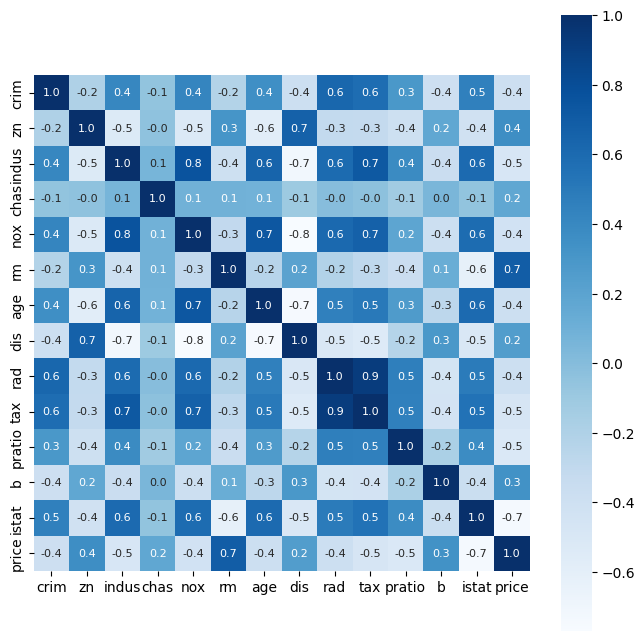

In [13]:
#constructing a Heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')


Splitting the data and Target

In [14]:
X=df.drop(["price"],axis=1)
y=df["price"]
print(X)
print(y)

        crim    zn  indus  chas    nox     rm   age     dis  rad    tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     pratio       b  istat  
0      15.3  396.90   4.98  
1      17.8  396.90   9.14  
2      17.8 

Splitting the data into training data and testing data

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


Model Training-
XGBoost Regressor


In [16]:
#Loading the model
model=XGBRegressor()
#training the model with X_train
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Evaluation

Prediction on training data

In [23]:
from sklearn.metrics import r2_score

#accuracy for prediction on training data
training_data_prediction=model.predict(X_train)
training_data_accuracy=r2_score(training_data_prediction,y_train)

In [24]:
#R squared error
score_1=metrics.r2_score(y_train,training_data_prediction)
print("R-squared score on training data:",score_1)
#Mean Absolute Error
score_2=metrics.mean_absolute_error(y_train,training_data_prediction)
print("Mean Absolute Error on training data:",score_2)

R-squared score on training data: 0.9999980039471451
Mean Absolute Error on training data: 0.0091330346494618


Prediction on test data

In [25]:
#accuracy for prediction on testing data
testing_data_prediction=model.predict(X_test)
testing_data_accuracy=r2_score(testing_data_prediction,y_test)
print("Accuracy on testing data:",testing_data_accuracy)
#R squared error
score_3=metrics.r2_score(y_test,testing_data_prediction)
print("R-squared score on testing data:",score_3)
#Mean Absolute Error
score_4=metrics.mean_absolute_error(y_test,testing_data_prediction)
print("Mean Absolute Error on testing data:",score_4)

Accuracy on testing data: 0.8981202952337628
R-squared score on testing data: 0.9051721149855378
Mean Absolute Error on training data: 2.0748727686264927


Visualizing the actual prices and predicted prices


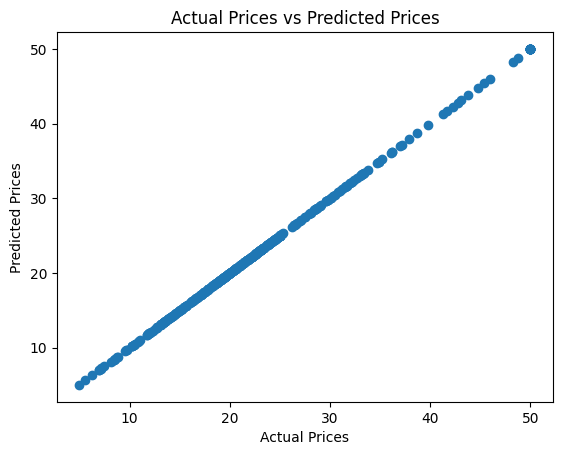

In [26]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual Prices"  )
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()